# Ali Abdullah Ahmad
# CWID- 20031246

In [1]:
import numpy as np

A-Implement forward propagation as a function:

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_prop(x, y, ws, bs):
    zs = [x]  # Store activations for each layer
    
    for w, b in zip(ws, bs):
        z = np.dot(w, zs[-1]) + b  # Linear transformation
        a = sigmoid(z)  # Apply activation function
        zs.append(a)  # Store activation
    
    # Compute total error using squared error loss
    E = 0.5 * np.sum((zs[-1] - y) ** 2)
    
    return zs, E

In [52]:

# Example usage
x = np.array([0.7, 0.3, 0.5]).reshape(3, 1)
y = np.array([1]).reshape(1, 1)
weights = [
    np.array([[-1.0, -2.3, 1.7], [-0.8, 0.3, 1.4]]), 
    np.array([[-2.0, -0.4]])
]
biases = [
    np.array([[1.6], [-0.6]]), 
    np.array([[-0.5]])
]

zs, E = forward_prop(x, y, weights, biases)

print(f'zs = {zs}')
print(f'E = {E}')

zs = [array([[0.7],
       [0.3],
       [0.5]]), array([[0.74269055],
       [0.40854102]]), array([[0.10444365]])]
E = 0.4010105918229552


B. [20 pts] Implement back propagation as a function. It must return the updated weights and biases.

In [53]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def back_prop(y, zs, ws, bs, eta):
    deltas = [(zs[-1] - y) * sigmoid_derivative(np.dot(ws[-1], zs[-2]) + bs[-1])]  # Compute error at output layer
    
    # Compute deltas for hidden layers
    for i in range(len(ws) - 2, -1, -1):
        dz = np.dot(ws[i + 1].T, deltas[0]) * sigmoid_derivative(np.dot(ws[i], zs[i]) + bs[i])
        deltas.insert(0, dz)

    # Update weights and biases
    for i in range(len(ws)):
        ws[i] -= eta * np.dot(deltas[i], zs[i].T)
        bs[i] -= eta * deltas[i]
    
    return ws, bs



In [54]:
# Example usage
x = np.array([0.7, 0.3, 0.5]).reshape(3, 1)
y = np.array([1]).reshape(1, 1)
weights = [
    np.array([[-1.0, -2.3, 1.7], [-0.8, 0.3, 1.4]]), 
    np.array([[-2.0, -0.4]])
]
biases = [
    np.array([[1.6], [-0.6]]), 
    np.array([[-0.5]])
]

zs, E = forward_prop(x, y, weights, biases)
eta = 3.0
weights, biases = back_prop(y, zs, weights, biases, eta)

print(f'zs = {zs}')
print(f'E = {E}')
print(f'weights = {weights}')
print(f'biases = {biases}')

zs = [array([[0.7],
       [0.3],
       [0.5]]), array([[0.74269055],
       [0.40854102]]), array([[0.10444365]])]
E = 0.4010105918229552
weights = [array([[-1.06723274, -2.32881403,  1.65197662],
       [-0.81700229,  0.2927133 ,  1.38785551]]), array([[-1.81336331, -0.29733444]])]
biases = [array([[ 1.50395323],
       [-0.62428899]]), array([[-0.24870195]])]


c. [20 pts] Run your code on the following example and report the output.

In [55]:
x = np.array([5.2, -2.3, -1.7, 8.3]).reshape(4, 1)
y = np.array([0, 1]).reshape(2, 1)
eta = 5.0
weights = [
    np.array([
        [0.09, -0.68, -0.38, 0.93],
        [-0.37, 0.61, 0.45, 0.57],
        [-0.29, -0.76, 0.46, 0.01]
    ]),
    np.array([
        [0.20, -0.20, 0.83],
        [0.35, -0.59, 0.36]
    ])
]
biases = [
    np.array([[-0.53], [0.84], [-0.34]]),
    np.array([[-0.31], [0.36]])
]

zs, E = forward_prop(x, y, weights, biases)
print(f'zs = {zs}')
print(f'E = {E}')

weights, biases = back_prop(y, zs, weights, biases, eta)
print(f'weights = {weights}')
print(f'biases = {biases}')

zs = [array([[ 5.2],
       [-2.3],
       [-1.7],
       [ 8.3]]), array([[0.99994814],
       [0.81442149],
       [0.31023947]]), array([[0.4961511 ],
       [0.58447212]])]
E = 0.2094146646690716
weights = [array([[ 0.09001418, -0.68000627, -0.38000463,  0.93002263],
       [-0.50649493,  0.67037276,  0.49462334,  0.35213309],
       [-0.660631  , -0.59606706,  0.58116783, -0.5815841 ]]), array([[-0.42011997, -0.70506522,  0.63760433],
       [ 0.8545586 , -0.17905532,  0.51654211]])]
biases = [array([[-0.52999727],
       [ 0.81375097],
       [-0.41127519]]), array([[-0.93015212],
       [ 0.86458477]])]


## 2 Training Data Process

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

A.

In [57]:
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS559_Applications_of_ML/HW/hw3/Hitters.csv')

In [58]:
train_data , test_data = train_test_split(df , test_size=0.2, random_state=42)

b. EDA

In [59]:
train_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
180,550,147,29,85,91,71,6,2816,815,117,405,474,319,A,W,1218,104,10,1310.000,A
17,190,46,2,24,8,15,5,479,102,5,65,23,39,A,W,102,177,16,175.000,A
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
176,181,58,6,34,23,22,1,181,58,6,34,23,22,N,W,88,0,3,86.500,N
110,441,128,16,70,73,80,14,6675,2095,209,1072,1050,695,A,W,97,218,16,1500.000,A


In [60]:
train_data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,212.000000
mean,379.408560,100.089494,10.836576,50.688716,47.579767,38.902724,7.354086,2608.284047,705.361868,69.097276,353.642023,323.867704,257.937743,295.793774,103.626459,8.093385,524.325505
std,154.389373,46.256289,8.634310,25.622645,26.654665,21.277424,4.946107,2348.254437,660.386468,86.303981,338.897806,329.746609,271.112011,288.398759,133.100234,6.412195,440.591424
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,244.000000,61.000000,4.000000,31.000000,27.000000,22.000000,3.000000,711.000000,185.000000,12.000000,93.000000,80.000000,62.000000,110.000000,8.000000,3.000000,170.250000
50%,374.000000,96.000000,8.000000,47.000000,43.000000,35.000000,6.000000,1897.000000,491.000000,38.000000,246.000000,219.000000,174.000000,212.000000,40.000000,6.000000,422.500000
75%,517.000000,139.000000,16.000000,70.000000,63.000000,53.000000,11.000000,3859.000000,1000.000000,90.000000,513.000000,430.000000,326.000000,326.000000,150.000000,12.000000,750.000000
max,680.000000,223.000000,40.000000,119.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [61]:
train_data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       45
NewLeague     0
dtype: int64

Substituting mean of salary in null places

In [62]:
train_data['Salary'] = train_data['Salary'].fillna(train_data['Salary'].mean())
train_data.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [63]:
train_data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,379.408560,100.089494,10.836576,50.688716,47.579767,38.902724,7.354086,2608.284047,705.361868,69.097276,353.642023,323.867704,257.937743,295.793774,103.626459,8.093385,524.325505
std,154.389373,46.256289,8.634310,25.622645,26.654665,21.277424,4.946107,2348.254437,660.386468,86.303981,338.897806,329.746609,271.112011,288.398759,133.100234,6.412195,399.997507
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,244.000000,61.000000,4.000000,31.000000,27.000000,22.000000,3.000000,711.000000,185.000000,12.000000,93.000000,80.000000,62.000000,110.000000,8.000000,3.000000,200.000000
50%,374.000000,96.000000,8.000000,47.000000,43.000000,35.000000,6.000000,1897.000000,491.000000,38.000000,246.000000,219.000000,174.000000,212.000000,40.000000,6.000000,524.325505
75%,517.000000,139.000000,16.000000,70.000000,63.000000,53.000000,11.000000,3859.000000,1000.000000,90.000000,513.000000,430.000000,326.000000,326.000000,150.000000,12.000000,700.000000
max,680.000000,223.000000,40.000000,119.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

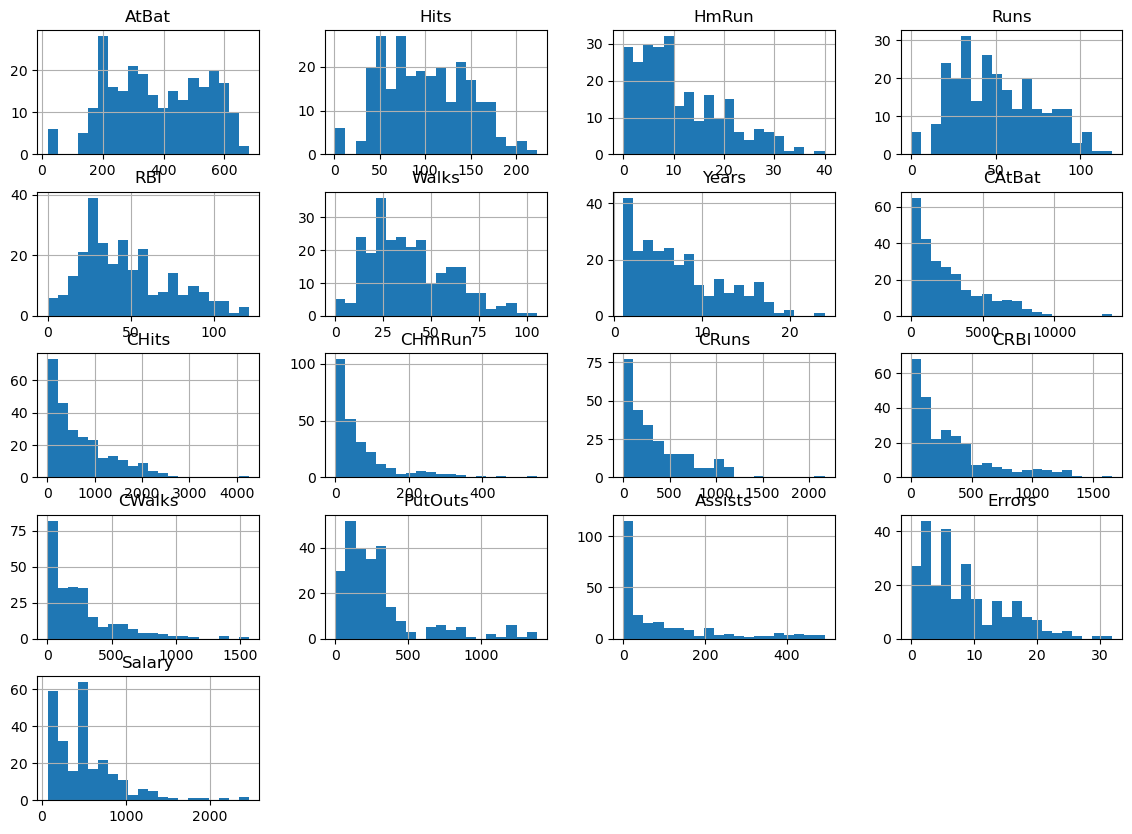

In [65]:
train_data.hist(bins=20, figsize=(14, 10))
plt.show()

### Right-Skewed Distributions (Long Tail on the Right)

Salary: Most players earn relatively low salaries, while a few have extremely high earnings.

CRBI, CHits, and CRuns: A majority of players have relatively low career totals, but a few outliers have significantly higher numbers.

Errors: Most players make only a few errors, but some commit a lot more.


### Bimodal Distributions (Two Peaks)

Years: There are two main groups—players with very short careers and those who last significantly longer.

HmRun: Many players hit only a few home runs, but there’s a separate group with significantly more.


### Roughly Normal Distributions (Bell Curve Shape)

AtBat, Hits, Runs, and RBI: These have a more balanced distribution, meaning that most players have similar values, with fewer extremes.

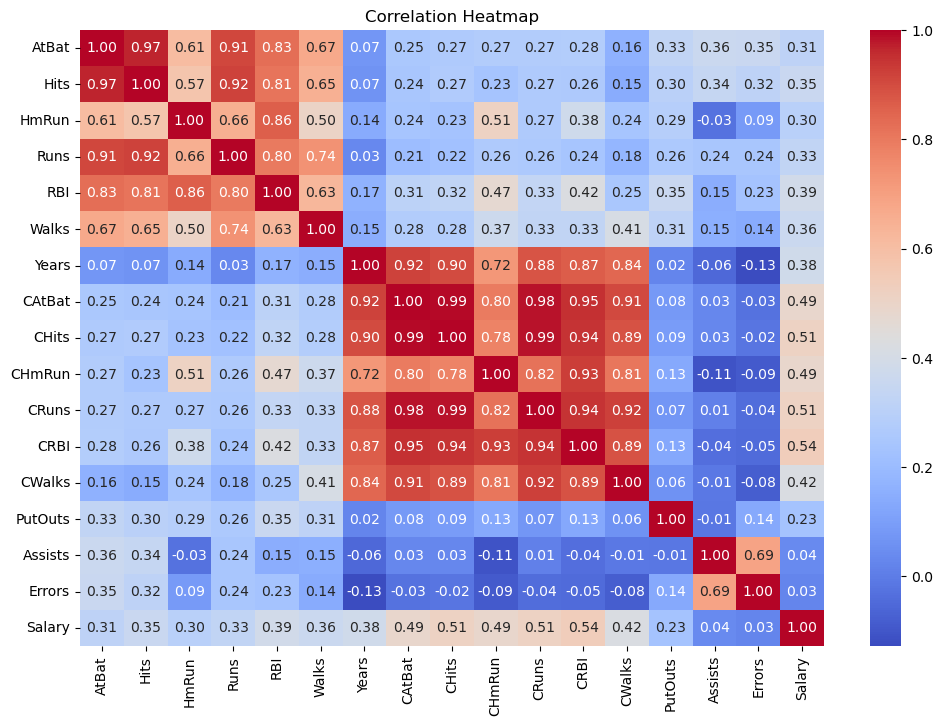

In [66]:
# Calculate the correlation matrix
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train_data[numeric_columns].corr()

# Plot the heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Strong Positive Correlations (Red Areas)

AtBat and Hits (~0.97): Players with more at-bats tend to get more hits.

Runs and RBI (~0.92): Players who score more runs also drive in more runs, which makes sense as both depend on offensive performance.

CHits and CRuns (~0.99): Career hits and career runs are almost perfectly correlated, indicating that players with long careers and more hits also score more runs.

CRBI and CRuns (~0.94): Career RBI and career runs are highly related, showing that productive players contribute to both scoring and driving in runs.

### Moderate Correlations with Salary

CHits (~0.51), CRuns (~0.51), and CRBI (~0.54) are positively correlated with salary. This suggests that players with better career stats tend to earn higher salaries.

However, single-season stats like AtBat and Hits have weaker correlations (~0.3–0.4), implying that long-term performance impacts salary more than short-term success.


### Low or Negative Correlations (Blue Areas)

HmRun and Assists (~ -0.03): Home runs and defensive assists are weakly related, showing that hitting and fielding performance don’t necessarily impact each other.

Years and PutOuts (~0.08): A player’s experience (years in MLB) does not strongly determine their fielding stats like putouts.

c(15 points) & d(10 points).

In [67]:
# Separate features and target variable
X_train = train_data.drop(columns=['Salary'])  # Features
y_train = train_data['Salary']                 # Target variable
X_test = test_data.drop(columns=['Salary'])    # Test features
y_test = test_data['Salary']                   # Test target

In [68]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [69]:
# Apply one-hot encoding to categorical variables
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

In [70]:
# Example: Create new features based on existing ones
X_train['Hits_per_AtBat'] = X_train['Hits'] / (X_train['AtBat'] + 1)  # Avoid division by zero
X_test['Hits_per_AtBat'] = X_test['Hits'] / (X_test['AtBat'] + 1)


In [71]:
# Compute correlation matrix
correlation_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_train = X_train.drop(columns=high_corr_features)
X_test = X_test.drop(columns=high_corr_features)

e.

In [72]:
# Combine features and target variable back together
train_data_processed = pd.concat([X_train, y_train], axis=1)
test_data_processed = pd.concat([X_test, y_test], axis=1)

# Save processed datasets
train_data_processed.to_csv('train_data_processed.csv', index=False)
test_data_processed.to_csv('test_data_processed.csv', index=False)